In [1]:
import random

import pandas

from hilbert.curves import Polynomial, Xlog

from curve_fits import Call, Spec

from curve_fits import frames

In [2]:
def random_ints_array(size, max_abs=100):
    return random.choices(range(-max_abs, max_abs), k=size)

In [9]:
size_range = range(1300, 2000)
init_calls = [Call(random_ints_array(size)) for size in size_range]
profile = frames.TimeComplexityProfile('list', init_calls, {'pop': Call(), 'copy': Call(), 'sort': Call()},
    index=pandas.Index(size_range, name='List length'), loops=100, overfit=-6, fraction=0.9)

In [11]:
profile.fit_all_with(Call(Spec(Polynomial, 2)), Call(Spec(Xlog, 1, pole=1000)))

In [12]:
profile.best_fits(limit=None)

kind                                            fit DOF
key  cost                                                                
pop  0.000087     Xlog  (0.000005678 ± 5.0E-8)(x - 1000)log(x - 1000)   1
     0.000099  Poly(1)  (-0.00491 ± 0.00078) + (0.00001858 ± 4.7E-7)x   2
copy 0.000064     Xlog  (0.000006169 ± 5.3E-8)(x - 1000)log(x - 1000)   1
     0.000162  Poly(1)  (-0.00351 ± 0.00059) + (0.00001917 ± 3.5E-7)x   2
sort 0.000172  Poly(1)    (-0.0256 ± 0.0011) + (0.00017268 ± 6.7E-7)x   2
     0.000627     Xlog   (0.00005695 ± 4.8E-7)(x - 1000)log(x - 1000)   1

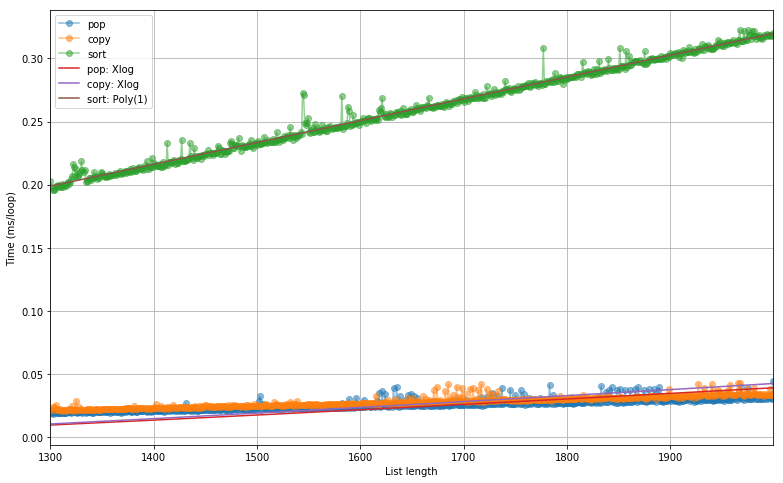

In [13]:
fig, ax = profile.plot(limit=1)

In [7]:
[fit.measures for fit in profile.best_fits(1).fit]

[(<Measure: -0.01831 ± 0.00042>, <Measure: 0.00002699 ± 2.2E-7>),
 (<Measure: 0.01495 ± 0.00067>, <Measure: 0.00001230 ± 3.6E-7>),
 (<Measure: -0.03403 ± 0.00071>, <Measure: 0.00017785 ± 3.8E-7>)]

In [8]:
profile.best_fit('sort'), profile.best_fit('pop')

(<CurveFit: (-0.03403 ± 0.00071) + (0.00017785 ± 3.8E-7)x>,
 <CurveFit: (-0.01831 ± 0.00042) + (0.00002699 ± 2.2E-7)x>)